In [3]:
import scipy.io as sio
normal_data = sio.loadmat(r'C:\Users\medici\901\CWRU\normal_1750_1.mat')
normal_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:19:25 2000',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[1]], dtype=uint8),
 'X098_DE_time': array([[ 0.046104  ],
        [-0.03713354],
        [-0.089496  ],
        ...,
        [-0.09909231],
        [-0.10827138],
        [-0.07092923]]),
 'X098_FE_time': array([[ 0.02321636],
        [ 0.08115455],
        [ 0.09533091],
        ...,
        [-0.00760182],
        [ 0.04026909],
        [ 0.06102   ]]),
 'X099_DE_time': array([[ 0.06425354],
        [ 0.06300185],
        [-0.00438092],
        ...,
        [ 0.00521538],
        [-0.06571385],
        [-0.12266585]]),
 'X099_FE_time': array([[0.03862545],
        [0.09676909],
        [0.12738182],
        ...,
        [0.03164   ],
        [0.113     ],
        [0.16292545]])}

In [4]:
normal_DE1=normal_data['X098_DE_time']

In [5]:
normal_FE1=normal_data['X098_FE_time']

In [6]:
normal_DE2=normal_data['X099_DE_time']
normal_FE2=normal_data['X099_FE_time']

In [11]:
normal_FE2.shape

(485063, 1)

In [12]:
inner_data = sio.loadmat(r'C:\Users\medici\901\CWRU\inner_1750_1.mat')

In [13]:
inner_data #rpm 1748

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:39:08 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X111_DE_time': array([[ 0.06133292],
        [-0.01564615],
        [-0.09679754],
        ...,
        [-0.17419385],
        [-0.17669723],
        [-0.20423446]]),
 'X111_FE_time': array([[0.15306364],
        [0.35461455],
        [0.44706909],
        ...,
        [0.37783091],
        [0.36098364],
        [0.33016545]]),
 'X111RPM': array([[1748]], dtype=uint16)}

In [14]:
inner_DE=inner_data['X111_DE_time']
inner_FE=inner_data['X111_FE_time']

In [16]:
inner_FE.shape

(485643, 1)

In [17]:
roller_data = sio.loadmat(r'C:\Users\medici\901\CWRU\roller_1750_1.mat')
roller_data #rpm 1747

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:49:17 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X124_DE_time': array([[ 0.09992677],
        [ 0.14164985],
        [ 0.17836615],
        ...,
        [-0.08490646],
        [-0.05945538],
        [-0.00625846]]),
 'X124_FE_time': array([[-0.07416909],
        [-0.04972   ],
        [-0.02198364],
        ...,
        [-0.03698182],
        [-0.07868909],
        [-0.12635455]]),
 'X124RPM': array([[1747]], dtype=uint16)}

In [18]:
roller_DE=roller_data['X124_DE_time']
roller_FE=roller_data['X124_FE_time']

In [20]:
roller_FE.shape

(486804, 1)

In [28]:
print(roller_FE.size == 0)
print(roller_DE.size == 0)
print(inner_DE.size == 0)
print(inner_FE.size == 0)
print(normal_DE1.size == 0)
print(normal_DE2.size == 0)
print(normal_FE1.size == 0)
print(normal_FE2.size == 0)

False
False
False
False
False
False
False
False


In [29]:
outer_data = sio.loadmat(r'C:\Users\medici\901\CWRU\outer_1750_1.mat')
outer_data #rpm 1750

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:58:32 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X137_DE_time': array([[-0.967796  ],
        [-1.73360267],
        [-2.226056  ],
        ...,
        [ 1.205676  ],
        [ 1.15350933],
        [ 0.89601467]]),
 'X137_FE_time': array([[ 0.32420727],
        [-0.00739636],
        [-0.30900364],
        ...,
        [-0.06554   ],
        [ 0.01890182],
        [ 0.08608545]]),
 'X137RPM': array([[1750]], dtype=uint16)}

In [30]:
outer_DE=outer_data['X137_DE_time']
outer_FE=outer_data['X137_FE_time']

In [31]:
print(outer_FE.size == 0)
print(outer_DE.size == 0)

False
False


In [34]:
outer_FE.shape
outer_DE.shape

(486804, 1)

In [26]:
import pandas as pd

# outer_DE 배열을 DataFrame으로 변환
outer_DE_df = pd.DataFrame(outer_DE, columns=["Signal"])

# 결과 확인
print(outer_DE_df.head())


     Signal
0 -0.967796
1 -1.733603
2 -2.226056
3 -2.353343
4 -2.072060


In [27]:
row_data = outer_DE_df['Signal'].values

# 17가지 특성 계산
mean = np.mean(row_data)
absolute_mean = np.mean(np.abs(row_data))
absolute_max = np.max(np.abs(row_data))
std_dev = np.std(row_data)
variance = np.var(row_data)
peak_to_peak = np.ptp(row_data)
peak = np.max(row_data)
skewness = skew(row_data)
kurt = kurtosis(row_data)
rms = np.sqrt(np.mean(np.square(row_data)))
crest_factor = peak / rms if rms != 0 else np.nan
impulse_factor = peak / absolute_mean if absolute_mean != 0 else np.nan
margin = peak / variance if variance != 0 else np.nan
power = np.mean(np.square(row_data))
shape_factor = rms / absolute_mean if absolute_mean != 0 else np.nan
rest_factor = rms / std_dev if std_dev != 0 else np.nan
rms_absolute = np.sqrt(np.mean(np.square(np.abs(row_data))))
clearance_factor = peak / rms_absolute if rms_absolute != 0 else np.nan

# 결과를 새로운 데이터프레임에 저장
outer_DE_stat = pd.DataFrame({
    "Mean": [mean],
    "Absolute Mean": [absolute_mean],
    "Absolute Max": [absolute_max],
    "Std Dev": [std_dev],
    "Variance": [variance],
    "Peak-to-Peak": [peak_to_peak],
    "Peak": [peak],
    "Skewness": [skewness],
    "Kurtosis": [kurt],
    "RMS": [rms],
    "Crest Factor": [crest_factor],
    "Impulse Factor": [impulse_factor],
    "Margin": [margin],
    "Power": [power],
    "Shape Factor": [shape_factor],
    "Rest Factor": [rest_factor],
    "Clearance Factor": [clearance_factor]
})

# 결과 출력
print(outer_DE_stat)

      Mean  Absolute Mean  Absolute Max   Std Dev  Variance  Peak-to-Peak  \
0  0.01224       0.644102      5.469153  1.020835  1.042105     10.743829   

       Peak  Skewness  Kurtosis       RMS  Crest Factor  Impulse Factor  \
0  5.469153  0.078715  3.937055  1.020909      5.357142        8.491126   

    Margin     Power  Shape Factor  Rest Factor  Clearance Factor  
0  5.24818  1.042255       1.58501     1.000072          5.357142  


In [28]:
outer_FE_df = pd.DataFrame(outer_FE, columns=["Signal"])
roller_FE_df = pd.DataFrame(roller_FE, columns=["Signal"])
roller_DE_df = pd.DataFrame(roller_DE, columns=["Signal"])
inner_FE_df = pd.DataFrame(inner_FE, columns=["Signal"])
inner_DE_df = pd.DataFrame(inner_DE, columns=["Signal"])
normal_FE1_df = pd.DataFrame(normal_DE1, columns=["Signal"])
normal_DE1_df = pd.DataFrame(normal_FE1, columns=["Signal"])
normal_FE2_df = pd.DataFrame(normal_DE2, columns=["Signal"])
normal_DE2_df = pd.DataFrame(normal_FE2, columns=["Signal"])

In [1]:
row_data.head()

NameError: name 'row_data' is not defined

In [29]:
row_data = outer_FE_df['Signal'].values

# 17가지 특성 계산
mean = np.mean(row_data)
absolute_mean = np.mean(np.abs(row_data))
absolute_max = np.max(np.abs(row_data))
std_dev = np.std(row_data)
variance = np.var(row_data)
peak_to_peak = np.ptp(row_data)
peak = np.max(row_data)
skewness = skew(row_data)
kurt = kurtosis(row_data)
rms = np.sqrt(np.mean(np.square(row_data)))
crest_factor = peak / rms if rms != 0 else np.nan
impulse_factor = peak / absolute_mean if absolute_mean != 0 else np.nan
margin = peak / variance if variance != 0 else np.nan
power = np.mean(np.square(row_data))
shape_factor = rms / absolute_mean if absolute_mean != 0 else np.nan
rest_factor = rms / std_dev if std_dev != 0 else np.nan
rms_absolute = np.sqrt(np.mean(np.square(np.abs(row_data))))
clearance_factor = peak / rms_absolute if rms_absolute != 0 else np.nan

# 결과를 새로운 데이터프레임에 저장
outer_FE_stat = pd.DataFrame({
    "Mean": [mean],
    "Absolute Mean": [absolute_mean],
    "Absolute Max": [absolute_max],
    "Std Dev": [std_dev],
    "Variance": [variance],
    "Peak-to-Peak": [peak_to_peak],
    "Peak": [peak],
    "Skewness": [skewness],
    "Kurtosis": [kurt],
    "RMS": [rms],
    "Crest Factor": [crest_factor],
    "Impulse Factor": [impulse_factor],
    "Margin": [margin],
    "Power": [power],
    "Shape Factor": [shape_factor],
    "Rest Factor": [rest_factor],
    "Clearance Factor": [clearance_factor]
})

# 결과 출력
print(outer_FE_stat)

       Mean  Absolute Mean  Absolute Max   Std Dev  Variance  Peak-to-Peak  \
0  0.030963       0.155334       1.10062  0.201571  0.040631      2.097485   

      Peak  Skewness  Kurtosis       RMS  Crest Factor  Impulse Factor  \
0  1.10062  0.034519  0.995559  0.203936      5.396896         7.08551   

      Margin    Power  Shape Factor  Rest Factor  Clearance Factor  
0  27.088147  0.04159      1.312886     1.011729          5.396896  


In [30]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew

# 17가지 특성을 계산하고 결과를 반환하는 함수
def calculate_statistics(df):
    row_data = df['Signal'].values
    
    mean = np.mean(row_data)
    absolute_mean = np.mean(np.abs(row_data))
    absolute_max = np.max(np.abs(row_data))
    std_dev = np.std(row_data)
    variance = np.var(row_data)
    peak_to_peak = np.ptp(row_data)
    peak = np.max(row_data)
    skewness = skew(row_data)
    kurt = kurtosis(row_data)
    rms = np.sqrt(np.mean(np.square(row_data)))
    crest_factor = peak / rms if rms != 0 else np.nan
    impulse_factor = peak / absolute_mean if absolute_mean != 0 else np.nan
    margin = peak / variance if variance != 0 else np.nan
    power = np.mean(np.square(row_data))
    shape_factor = rms / absolute_mean if absolute_mean != 0 else np.nan
    rest_factor = rms / std_dev if std_dev != 0 else np.nan
    rms_absolute = np.sqrt(np.mean(np.square(np.abs(row_data))))
    clearance_factor = peak / rms_absolute if rms_absolute != 0 else np.nan

    # 결과를 데이터프레임 형태로 반환
    return pd.DataFrame({
        "Mean": [mean],
        "Absolute Mean": [absolute_mean],
        "Absolute Max": [absolute_max],
        "Std Dev": [std_dev],
        "Variance": [variance],
        "Peak-to-Peak": [peak_to_peak],
        "Peak": [peak],
        "Skewness": [skewness],
        "Kurtosis": [kurt],
        "RMS": [rms],
        "Crest Factor": [crest_factor],
        "Impulse Factor": [impulse_factor],
        "Margin": [margin],
        "Power": [power],
        "Shape Factor": [shape_factor],
        "Rest Factor": [rest_factor],
        "Clearance Factor": [clearance_factor]
    })

# 각 데이터프레임에 대해 17가지 특성을 계산하여 저장
outer_FE_stat = calculate_statistics(outer_FE_df)
roller_FE_stat = calculate_statistics(roller_FE_df)
roller_DE_stat = calculate_statistics(roller_DE_df)
inner_FE_stat = calculate_statistics(inner_FE_df)
inner_DE_stat = calculate_statistics(inner_DE_df)
normal_FE1_stat = calculate_statistics(normal_FE1_df)
normal_DE1_stat = calculate_statistics(normal_DE1_df)
normal_FE2_stat = calculate_statistics(normal_FE2_df)
normal_DE2_stat = calculate_statistics(normal_DE2_df)


In [32]:
all_stats_df = pd.concat([
    outer_DE_stat,
    outer_FE_stat,
    roller_FE_stat,
    roller_DE_stat,
    inner_FE_stat,
    inner_DE_stat,
    normal_FE1_stat,
    normal_DE1_stat,
    normal_FE2_stat,
    normal_DE2_stat
], ignore_index=True)

# 결합된 데이터프레임 출력
print(all_stats_df)

       Mean  Absolute Mean  Absolute Max   Std Dev  Variance  Peak-to-Peak  \
0  0.012240       0.644102      5.469153  1.020835  1.042105     10.743829   
1  0.030963       0.155334      1.100620  0.201571  0.040631      2.097485   
2  0.030412       0.081123      0.445836  0.096858  0.009381      0.879140   
3  0.016156       0.114241      0.740167  0.142697  0.020363      1.431727   
4  0.030712       0.185625      0.987209  0.232292  0.053960      1.961475   
5  0.017089       0.193752      1.696460  0.280163  0.078491      3.391878   
6  0.012564       0.053471      0.345884  0.065152  0.004245      0.663397   
7  0.032375       0.059494      0.321947  0.067346  0.004535      0.540140   
8  0.012261       0.051873      0.359236  0.063146  0.003987      0.686136   
9  0.031962       0.057738      0.311675  0.065078  0.004235      0.555960   

       Peak  Skewness  Kurtosis       RMS  Crest Factor  Impulse Factor  \
0  5.469153  0.078715  3.937055  1.020909      5.357142        8.4

In [35]:
# 새로운 열 'fault_type' 추가 및 초기화
all_stats_df['fault_type'] = None

# 각 인덱스에 지정된 값 할당
all_stats_df.loc[0, 'fault_type'] = 3
all_stats_df.loc[1, 'fault_type'] = 3
all_stats_df.loc[2, 'fault_type'] = 2
all_stats_df.loc[3, 'fault_type'] = 2
all_stats_df.loc[4, 'fault_type'] = 1
all_stats_df.loc[5, 'fault_type'] = 1
all_stats_df.loc[6, 'fault_type'] = 0
all_stats_df.loc[7, 'fault_type'] = 0
all_stats_df.loc[8, 'fault_type'] = 0
all_stats_df.loc[9, 'fault_type'] = 0

# 결과 확인
print(all_stats_df)


       Mean  Absolute Mean  Absolute Max   Std Dev  Variance  Peak-to-Peak  \
0  0.012240       0.644102      5.469153  1.020835  1.042105     10.743829   
1  0.030963       0.155334      1.100620  0.201571  0.040631      2.097485   
2  0.030412       0.081123      0.445836  0.096858  0.009381      0.879140   
3  0.016156       0.114241      0.740167  0.142697  0.020363      1.431727   
4  0.030712       0.185625      0.987209  0.232292  0.053960      1.961475   
5  0.017089       0.193752      1.696460  0.280163  0.078491      3.391878   
6  0.012564       0.053471      0.345884  0.065152  0.004245      0.663397   
7  0.032375       0.059494      0.321947  0.067346  0.004535      0.540140   
8  0.012261       0.051873      0.359236  0.063146  0.003987      0.686136   
9  0.031962       0.057738      0.311675  0.065078  0.004235      0.555960   

       Peak  Skewness  Kurtosis       RMS  Crest Factor  Impulse Factor  \
0  5.469153  0.078715  3.937055  1.020909      5.357142        8.4

In [36]:
all_stats_df.to_csv("CWRU_stat.csv", index=False)

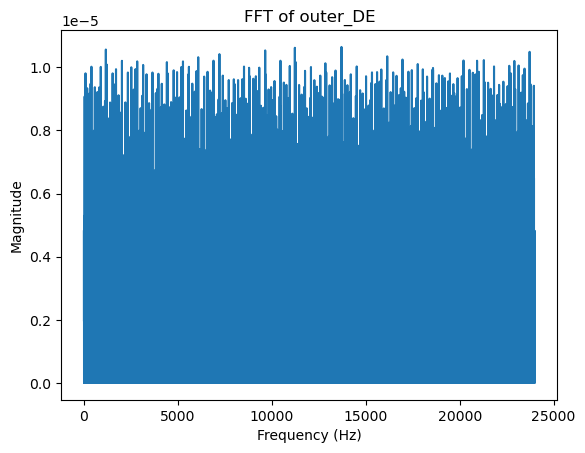

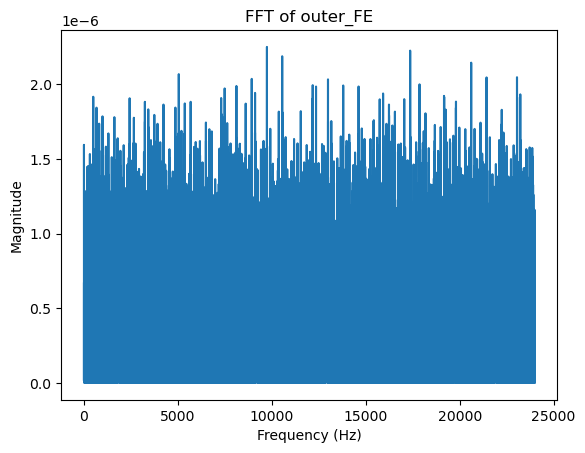

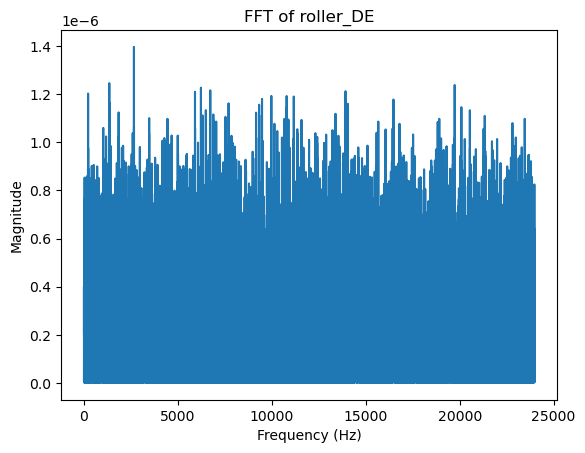

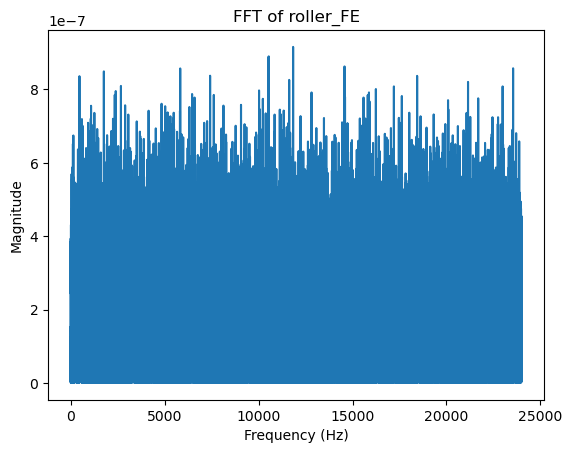

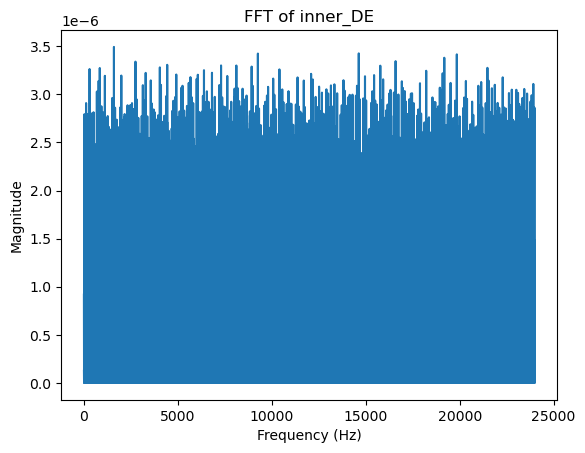

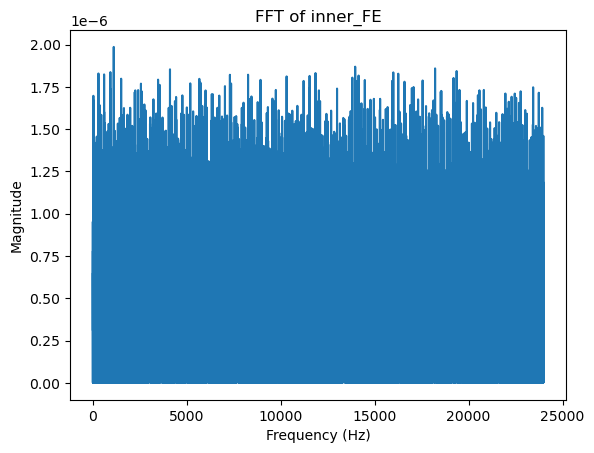

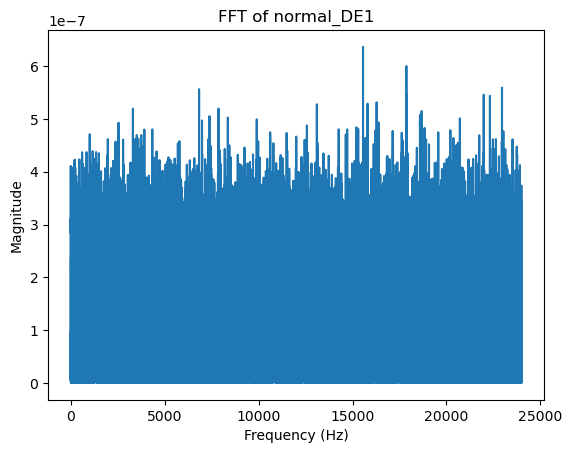

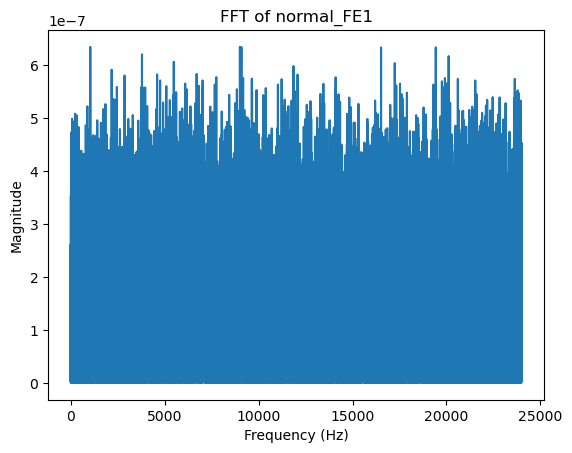

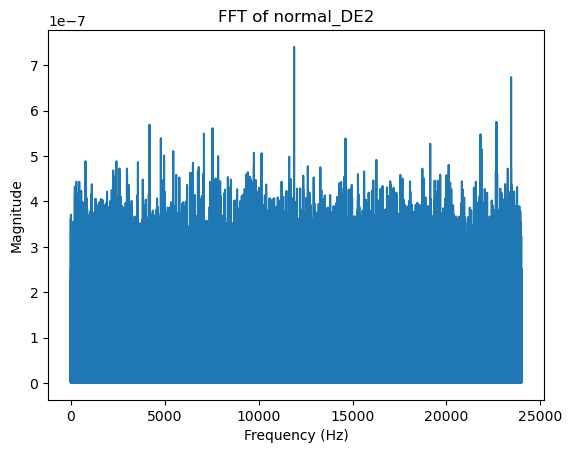

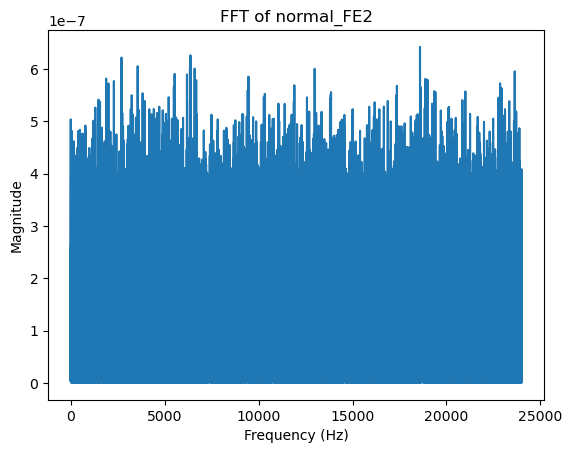

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

fs = 48000

def plot_fft(signal, fs, title):
    n = len(signal)
    freqs = fftfreq(n, 1 / fs)  # 주파수 계산
    fft_values = np.abs(fft(signal)) / n  # FFT 변환 및 정규화

    # 양수 주파수만 시각화
    plt.plot(freqs[:n // 2], fft_values[:n // 2])
    plt.title(f"FFT of {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

# 각 데이터 프레임에 대해 FFT 수행 및 시각화
data_frames = {
    'outer_DE': outer_DE,
    'outer_FE': outer_FE,
    'roller_DE': roller_DE,
    'roller_FE': roller_FE,
    'inner_DE': inner_DE,
    'inner_FE': inner_FE,
    'normal_DE1': normal_DE1,
    'normal_FE1': normal_FE1,
    'normal_DE2': normal_DE2,
    'normal_FE2': normal_FE2
}

for label, data in data_frames.items():
    plot_fft(data, fs, label)


data_frames = {
    'outer_DE': outer_DE,
    'outer_FE': outer_FE,
    'roller_DE': roller_DE,
    'roller_FE': roller_FE,
    'inner_DE': inner_DE,
    'inner_FE': inner_FE,
    'normal_DE1': normal_DE1,
    'normal_FE1': normal_FE1,
    'normal_DE2': normal_DE2,
    'normal_FE2': normal_FE2
}

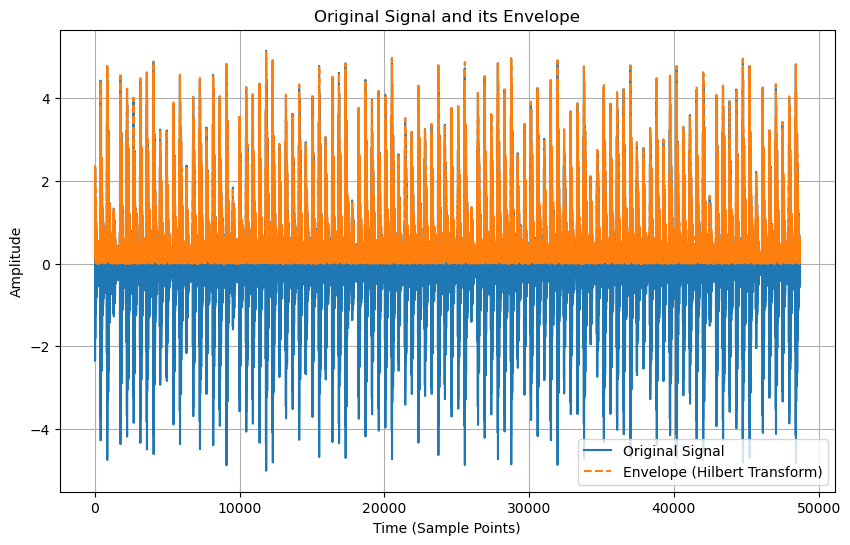

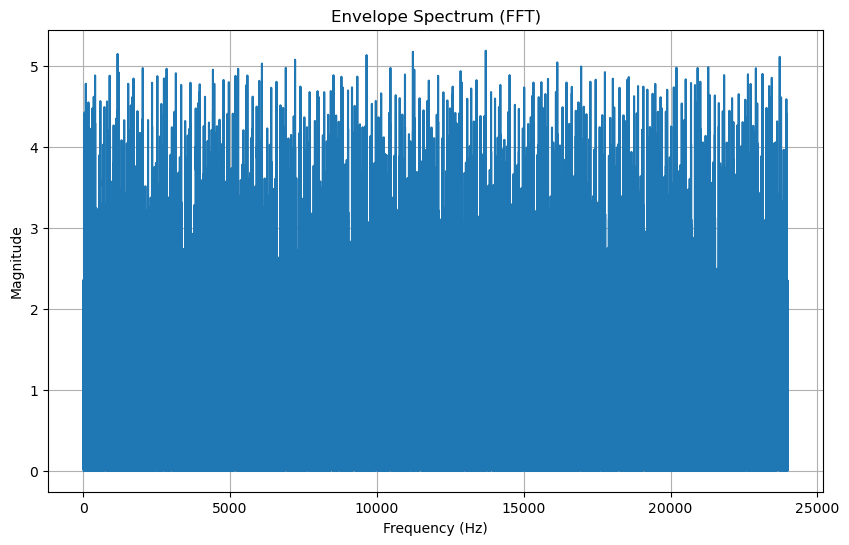

In [16]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 샘플링 주파수 설정
sampling_rate = 48000


signal = outer_DE

# 1. 힐버트 변환을 통해 신호의 외곽선(envelope) 추출
analytic_signal = hilbert(signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 원본 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(signal[:len(signal)//10], label='Original Signal')
plt.plot(envelope[:len(signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Original Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


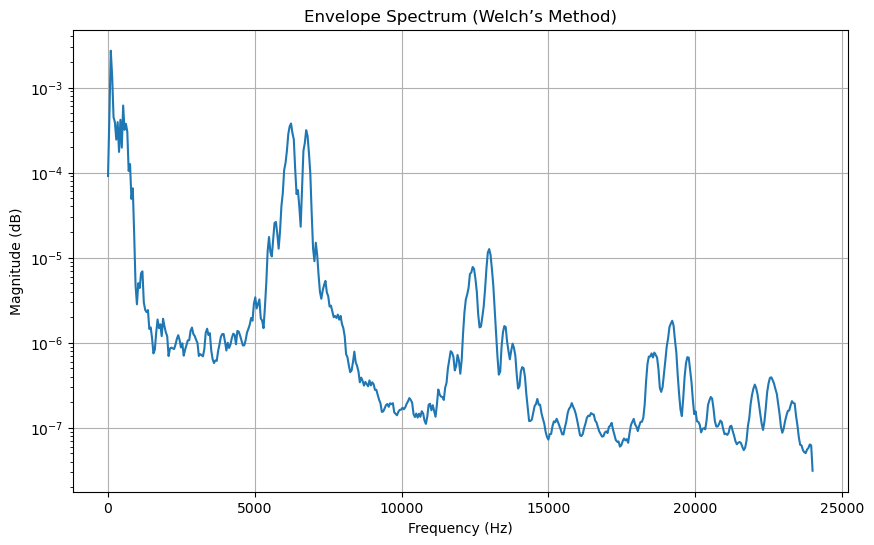

In [21]:
from scipy.signal import welch
import matplotlib.pyplot as plt

# 샘플링 주파수 설정
sampling_rate = 48000  # 예시, 데이터에 따라 수정 필요

# 웰치 방법을 통한 스펙트럼 추정
frequencies, power_spectrum = welch(envelope.squeeze(), fs=sampling_rate, nperseg=1024)

# 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)  # 스펙트럼을 로그 스케일로 표시
plt.title("Envelope Spectrum (Welch’s Method)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()
# 저주파의 영향이 큰 것을 확인


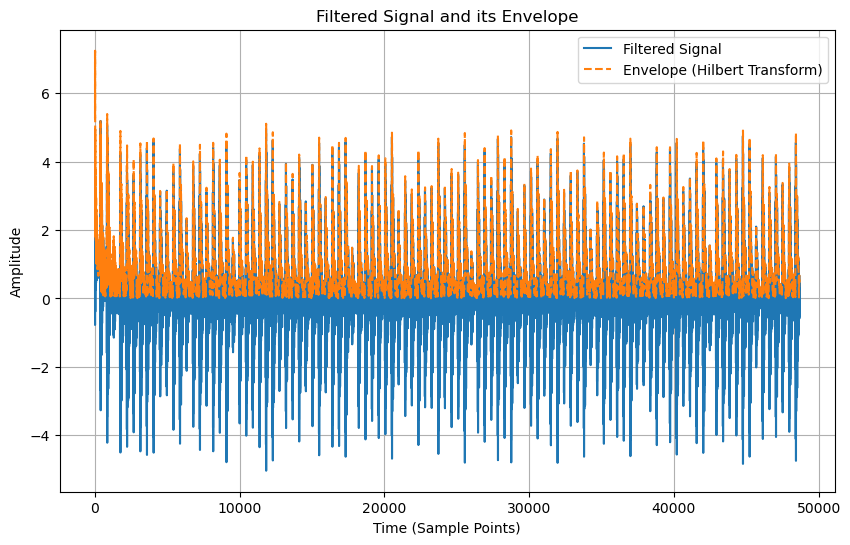

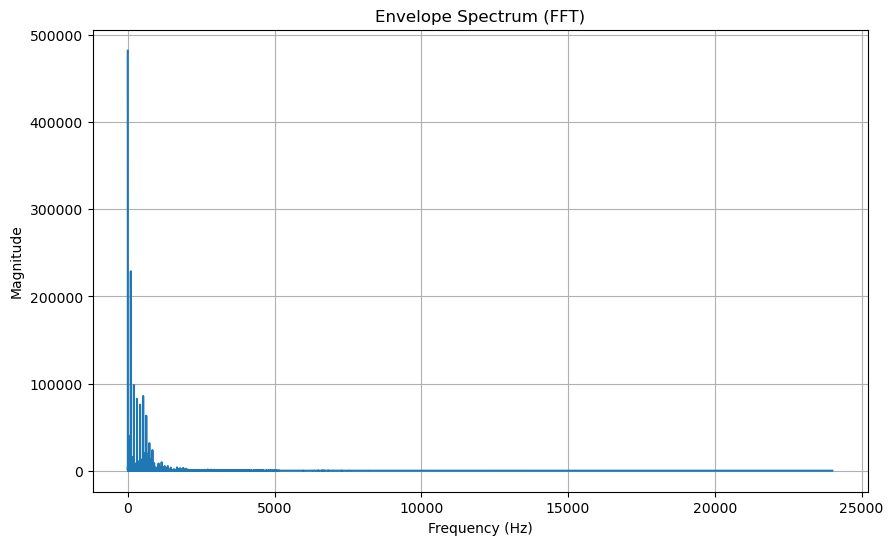

In [26]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 함수 (이전에 정의한 필터 함수로 대체)
def bandpass_filter(signal, lowcut, highcut, sampling_rate):
    from scipy.signal import butter, filtfilt
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal)

# 샘플링 주파수와 필터 설정
sampling_rate = 48000  # 예시, 데이터에 따라 수정 필요
lowcut = 10  # 필터 하한 주파수 (예시)
highcut = 5000  # 필터 상한 주파수 (예시)

# 예시 신호 처리 (예: row_300에 대한 처리)
filtered_signal = bandpass_filter(outer_DE_1d, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선(envelope) 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()
